#  Corona vaccine progress 
version 0.90 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-01-05 07:10:35.471370


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,source_name,source_website,vaccines,last_observation_date
0,Argentina,ARG,Government of Argentina,https://www.argentina.gob.ar/sites/default/fil...,Sputnik V,2020-12-31
1,Austria,AUT,Federal Ministry for Social Affairs and Health,https://www.sozialministerium.at/Informationen...,Pfizer/BioNTech,2020-12-30
2,Bahrain,BHR,Ministry of Health,https://twitter.com/MOH_Bahrain,Sinopharm,2021-01-04
3,Bulgaria,BGR,Ministry of Health,https://coronavirus.bg/bg/statistika,Pfizer/BioNTech,2021-01-01
4,Canada,CAN,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada,"Moderna, Pfizer/BioNTech",2021-01-03
5,Chile,CHL,Department of Statistics and Health Information,https://deis.minsal.cl/,Pfizer/BioNTech,2020-12-27
6,China,CHN,National Health Commission,https://www.globaltimes.cn/page/202012/1211515...,"CNBG, Sinovac",2020-12-31
7,Costa Rica,CRI,Government of Costa Rica,https://www.ccss.sa.cr/noticias/servicios_noti...,Pfizer/BioNTech,2021-01-03
8,Croatia,HRV,Ministry of Health,https://vlada.gov.hr/news/government-approves-...,Pfizer/BioNTech,2020-12-30
9,Denmark,DNK,Statens Serum Institut,https://covid19.ssi.dk/overvagningsdata/vaccin...,Pfizer/BioNTech,2021-01-03


## Latest reported

In [5]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:25]

,location,date,vaccine,total_vaccinations,source_url,iso_code,source_name,source_website,vaccines,last_observation_date,_merge
65,Estonia,2021-01-04,Pfizer/BioNTech,2535,https://www.terviseamet.ee/et/uudised/covid-19...,EST,National Health Board,https://www.terviseamet.ee/et/uudised/covid-19...,Pfizer/BioNTech,2021-01-04,both
81,Greece,2021-01-04,Pfizer/BioNTech,9528,https://www.reuters.com/article/health-coronav...,GRC,Ministry of Health,https://www.reuters.com/article/health-coronav...,Pfizer/BioNTech,2021-01-04,both
15,Bahrain,2021-01-04,Sinopharm,61612,https://twitter.com/MOH_Bahrain/status/1346173...,BHR,Ministry of Health,https://twitter.com/MOH_Bahrain,Sinopharm,2021-01-04,both
110,Italy,2021-01-04,Pfizer/BioNTech,128880,https://bit.ly/vaccini_covid19,ITA,Commissioner for the COVID-19 emergency,https://bit.ly/vaccini_covid19,Pfizer/BioNTech,2021-01-04,both
135,Poland,2021-01-04,Pfizer/BioNTech,50833,https://twitter.com/MZ_GOV_PL/status/134607406...,POL,Ministry of Health,https://twitter.com/MZ_GOV_PL/status/134607406...,Pfizer/BioNTech,2021-01-04,both
67,Finland,2021-01-04,Pfizer/BioNTech,3604,https://thl.fi/en/web/infectious-diseases-and-...,FIN,Department of Health and Welfare,https://thl.fi/en/web/infectious-diseases-and-...,Pfizer/BioNTech,2021-01-04,both
86,Hungary,2021-01-04,Pfizer/BioNTech,12000,https://vakcinainfo.gov.hu/hirek/orszagos-tisz...,HUN,Government of Hungary,https://vakcinainfo.gov.hu/hirek/orszagos-tisz...,Pfizer/BioNTech,2021-01-04,both
146,Romania,2021-01-04,Pfizer/BioNTech,25508,https://vaccinare-covid.gov.ro/actualizare-zil...,ROU,Government of Romania,https://vaccinare-covid.gov.ro/comunicate-ofic...,Pfizer/BioNTech,2021-01-04,both
155,Spain,2021-01-04,Pfizer/BioNTech,82834,https://twitter.com/eldiarioes/status/13461507...,ESP,Ministry of Health,https://twitter.com/eldiarioes/status/13461507...,Pfizer/BioNTech,2021-01-04,both
165,United States,2021-01-04,"Moderna, Pfizer/BioNTech",4563260,https://covid.cdc.gov/covid-data-tracker/#vacc...,USA,Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,"Moderna, Pfizer/BioNTech",2021-01-04,both


In [6]:
#Countries in list
allCountries["location"].value_counts()

Canada              21
Israel              15
Bahrain             13
Germany              8
Denmark              8
United States        8
Italy                7
Romania              7
Estonia              7
Oman                 6
Poland               6
Hungary              5
Mexico               5
Portugal             4
Chile                4
Scotland             3
Bulgaria             3
Wales                3
France               3
Northern Ireland     3
Russia               3
Greece               3
Costa Rica           2
Finland              2
China                2
Argentina            2
England              2
United Kingdom       2
Spain                1
Austria              1
Iceland              1
Slovakia             1
Croatia              1
Latvia               1
Lithuania            1
Kuwait               1
Luxembourg           1
Norway               1
Ireland              1
Slovenia             1
Name: location, dtype: int64

In [7]:
allCountries.groupby(["location", "vaccine"]).size()

location          vaccine                 
Argentina         Sputnik V                    2
Austria           Pfizer/BioNTech              1
Bahrain           Sinopharm                   13
Bulgaria          Pfizer/BioNTech              3
Canada            Moderna, Pfizer/BioNTech     4
                  Pfizer/BioNTech             17
Chile             Pfizer/BioNTech              4
China             CNBG, Sinovac                2
Costa Rica        Pfizer/BioNTech              2
Croatia           Pfizer/BioNTech              1
Denmark           Pfizer/BioNTech              8
England           Pfizer/BioNTech              2
Estonia           Pfizer/BioNTech              7
Finland           Pfizer/BioNTech              2
France            Pfizer/BioNTech              3
Germany           Pfizer/BioNTech              8
Greece            Pfizer/BioNTech              3
Hungary           Pfizer/BioNTech              5
Iceland           Pfizer/BioNTech              1
Ireland           Pfizer/B

In [8]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 165
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               158 non-null    object        
 1   date                   158 non-null    datetime64[ns]
 2   vaccine                158 non-null    object        
 3   total_vaccinations     158 non-null    int64         
 4   source_url             158 non-null    object        
 5   iso_code               158 non-null    object        
 6   source_name            158 non-null    object        
 7   source_website         158 non-null    object        
 8   vaccines               158 non-null    object        
 9   last_observation_date  158 non-null    object        
 10  _merge                 158 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 13.8+ KB


In [9]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape)


12 996 098 (36, 3)


## Charts

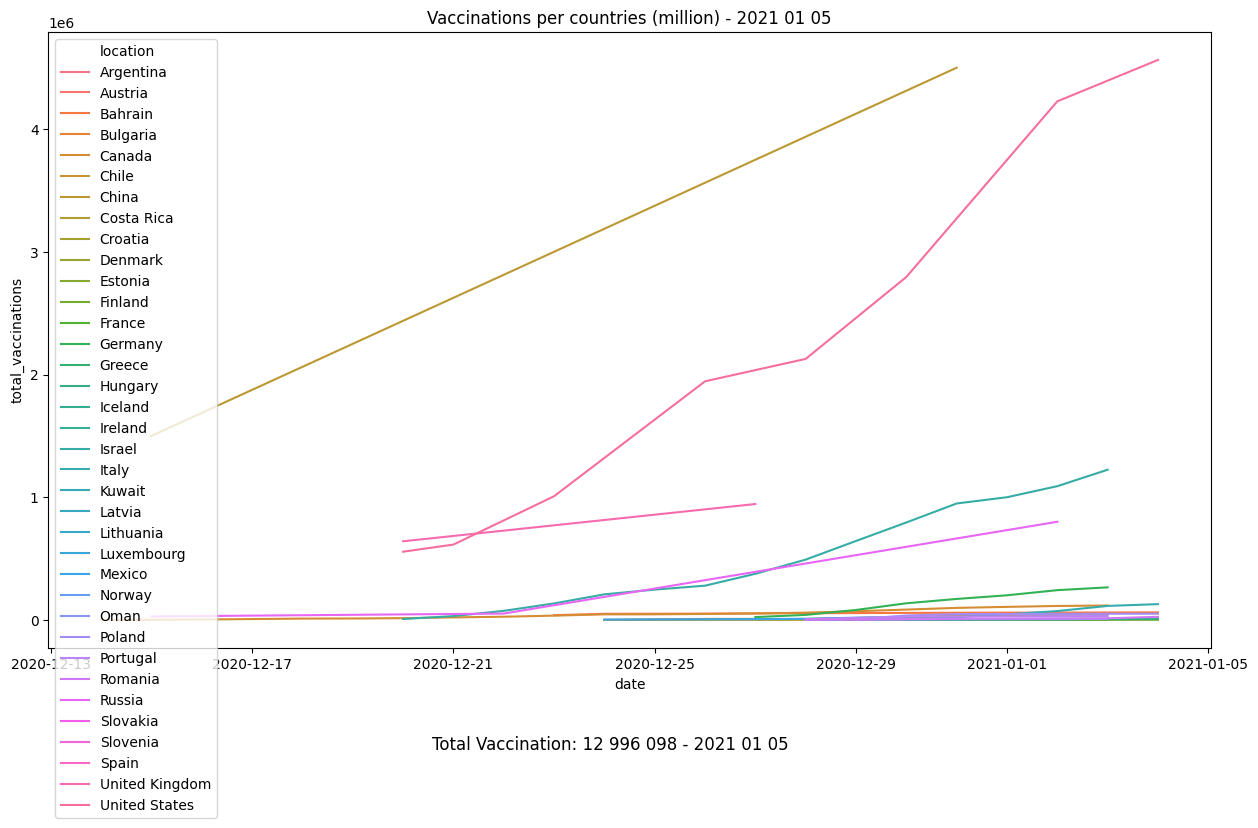

In [10]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str  + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


In [11]:
allCountriesFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 165
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               158 non-null    object        
 1   date                   158 non-null    datetime64[ns]
 2   vaccine                158 non-null    object        
 3   total_vaccinations     158 non-null    int64         
 4   source_url             158 non-null    object        
 5   iso_code               158 non-null    object        
 6   source_name            158 non-null    object        
 7   source_website         158 non-null    object        
 8   vaccines               158 non-null    object        
 9   last_observation_date  158 non-null    object        
 10  _merge                 158 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 13.8+ KB


In [12]:
# Resample dates Forward filling and sum

#allCountriesFiltered
#grouper = allCountriesFiltered.groupby([pd.Grouper(key="date",freq='1D'), 'location']).mean() 


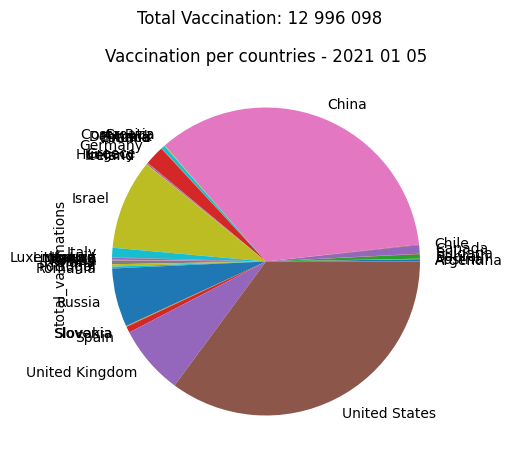

In [13]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [14]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,vaccine,iso_code
location,,,
United States,4563260,"Moderna, Pfizer/BioNTech",USA
China,4500000,"CNBG, Sinovac",CHN
Israel,1224000,Pfizer/BioNTech,ISR
United Kingdom,944539,Pfizer/BioNTech,GBR
Russia,800000,Sputnik V,RUS
Germany,265610,Pfizer/BioNTech,DEU
Italy,128880,Pfizer/BioNTech,ITA
Canada,117768,"Moderna, Pfizer/BioNTech",CAN
Spain,82834,Pfizer/BioNTech,ESP


In [15]:
plotLatestCountries.shape

(36, 3)

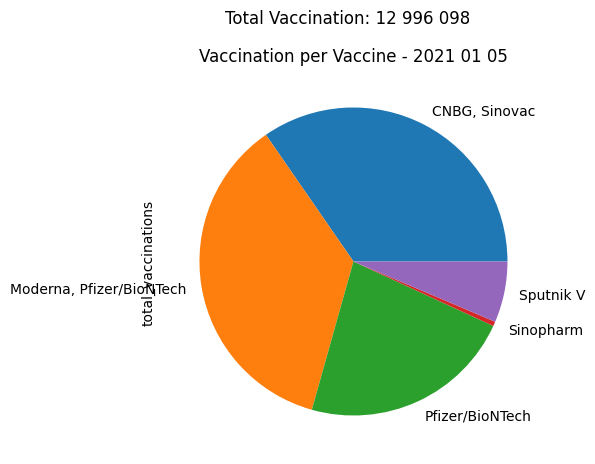

In [16]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [17]:
plotVaccine.sort_values(ascending=True)

vaccine
Sinopharm                     61612
Sputnik V                    832013
Pfizer/BioNTech             2921445
CNBG, Sinovac               4500000
Moderna, Pfizer/BioNTech    4681028
Name: total_vaccinations, dtype: int64

In [18]:
# Sweden have 10 000 doses....
#allCountries

In [19]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-05 07:10:48.849080
Time elapsed (hh:mm:ss.ms) 0:00:13.377939


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [20]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  194 non-null    object
 1   continent            194 non-null    object
 2   memberEU             194 non-null    object
 3   country              194 non-null    object
 4   qid                  194 non-null    object
 5   population           194 non-null    object
 6   ISO3166_1            194 non-null    object
 7   nominalGDPperCapita  191 non-null    object
 8   G20                  194 non-null    object
 9   IMF                  194 non-null    object
 10  genderH              194 non-null    object
dtypes: object(11)
memory usage: 16.8+ KB


In [21]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
181,http://www.wikidata.org/entity/Q189,Europe,false,Iceland,Q189,357050,ISL,71311,false,false,female
7,http://www.wikidata.org/entity/Q1044,Africa,false,Sierra Leone,Q1044,7557212,SLE,499,false,false,male
159,http://www.wikidata.org/entity/Q874,Asia,false,Turkmenistan,Q874,5850901,TKM,6586,false,false,male
108,http://www.wikidata.org/entity/Q1039,Africa,false,São Tomé and Príncipe,Q1039,204327,STP,1921,false,false,male
36,http://www.wikidata.org/entity/Q225,Europe,false,Bosnia and Herzegovina,Q225,3507017,BIH,5148,false,false,male


In [22]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Argentina,32013,Sputnik V,ARG
Austria,6000,Pfizer/BioNTech,AUT
Bahrain,61612,Sinopharm,BHR
Bulgaria,4739,Pfizer/BioNTech,BGR
Canada,117768,"Moderna, Pfizer/BioNTech",CAN
Chile,8648,Pfizer/BioNTech,CHL
China,4500000,"CNBG, Sinovac",CHN
Costa Rica,2455,Pfizer/BioNTech,CRI
Croatia,7864,Pfizer/BioNTech,HRV


In [23]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,32013,Sputnik V,ARG,http://www.wikidata.org/entity/Q414,South America,false,Argentina,Q414,44938712,ARG,14398,true,false,male,both
1,6000,Pfizer/BioNTech,AUT,http://www.wikidata.org/entity/Q40,Europe,true,Austria,Q40,8809212,AUT,44920,false,false,male,both
2,61612,Sinopharm,BHR,http://www.wikidata.org/entity/Q398,Asia,false,Bahrain,Q398,1492584,BHR,23739,false,false,male,both
3,4739,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,Bulgaria,Q219,7000039,BGR,8228,false,false,male,both
4,117768,"Moderna, Pfizer/BioNTech",CAN,http://www.wikidata.org/entity/Q16,North America,false,Canada,Q16,37894799,CAN,44870,true,false,male,both
5,8648,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,Chile,Q298,18054726,CHL,15346,false,false,male,both
6,4500000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,People's Republic of China,Q148,1409517397,CHN,8826,true,false,male,both
7,2455,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,Costa Rica,Q800,4905769,CRI,11677,false,false,male,both
8,7864,Pfizer/BioNTech,HRV,http://www.wikidata.org/entity/Q224,Europe,true,Croatia,Q224,4105493,HRV,13386,false,false,male,both
9,46975,Pfizer/BioNTech,DNK,http://www.wikidata.org/entity/Q35,Europe,true,Denmark,Q35,5827463,DNK,57218,false,false,female,both


In [24]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   total_vaccinations   36 non-null     int64   
 1   vaccine              36 non-null     object  
 2   iso_code             36 non-null     object  
 3   cid                  36 non-null     object  
 4   continent            36 non-null     object  
 5   memberEU             36 non-null     int64   
 6   country              36 non-null     object  
 7   qid                  36 non-null     object  
 8   population           36 non-null     int64   
 9   ISO3166_1            36 non-null     object  
 10  nominalGDPperCapita  36 non-null     float64 
 11  G20                  36 non-null     int64   
 12  IMF                  36 non-null     int64   
 13  genderH              36 non-null     object  
 14  _merge               36 non-null     category
 15  genderFlag           36 n

In [25]:
#CountriesData

In [26]:
CountriesData['Country'] = CountriesData.index

In [27]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.370062
population                         0.808281
nominalGDPperCapita                0.041480
G20                                0.459697
IMF                               -0.061159
genderFlag                         0.130909
Country                            0.133104
vaccinations_population_percent    0.195865
Name: total_vaccinations, dtype: float64

In [28]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.195865
memberEU                          -0.301415
population                        -0.034555
nominalGDPperCapita                0.108868
G20                               -0.079099
IMF                               -0.070356
genderFlag                         0.060104
Country                           -0.012843
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [29]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


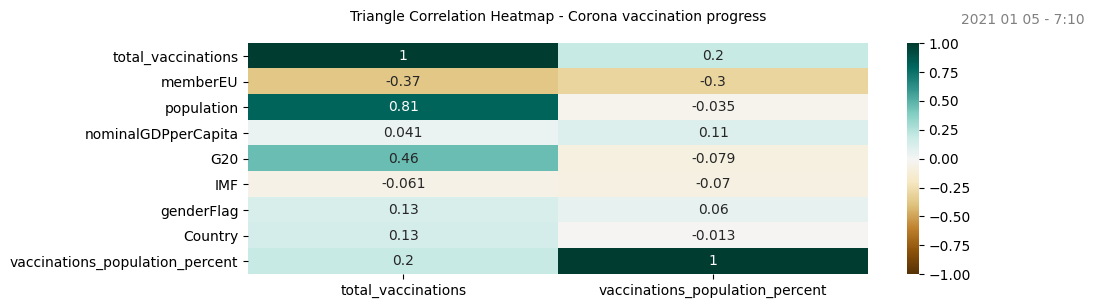

In [30]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [31]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,memberEU,G20,country,continent,vaccinations_population_percent,total_vaccinations,IMF,population
18,0,0,Israel,Asia,13.460904,1224000,0,9093000
2,0,0,Bahrain,Asia,4.127875,61612,0,1492584
34,0,1,United Kingdom,Europe,1.430637,944539,0,66022273
35,0,1,United States of America,North America,1.390223,4563260,0,328239523
16,0,0,Iceland,Europe,1.365355,4875,0,357050
9,1,0,Denmark,Europe,0.806097,46975,0,5827463
30,0,1,Russia,Europe,0.544943,800000,0,146804372
13,1,1,Germany,Europe,0.319437,265610,1,83149300
6,0,1,People's Republic of China,Asia,0.319258,4500000,0,1409517397
4,0,1,Canada,North America,0.310776,117768,0,37894799


## Vaccination numbers % of population

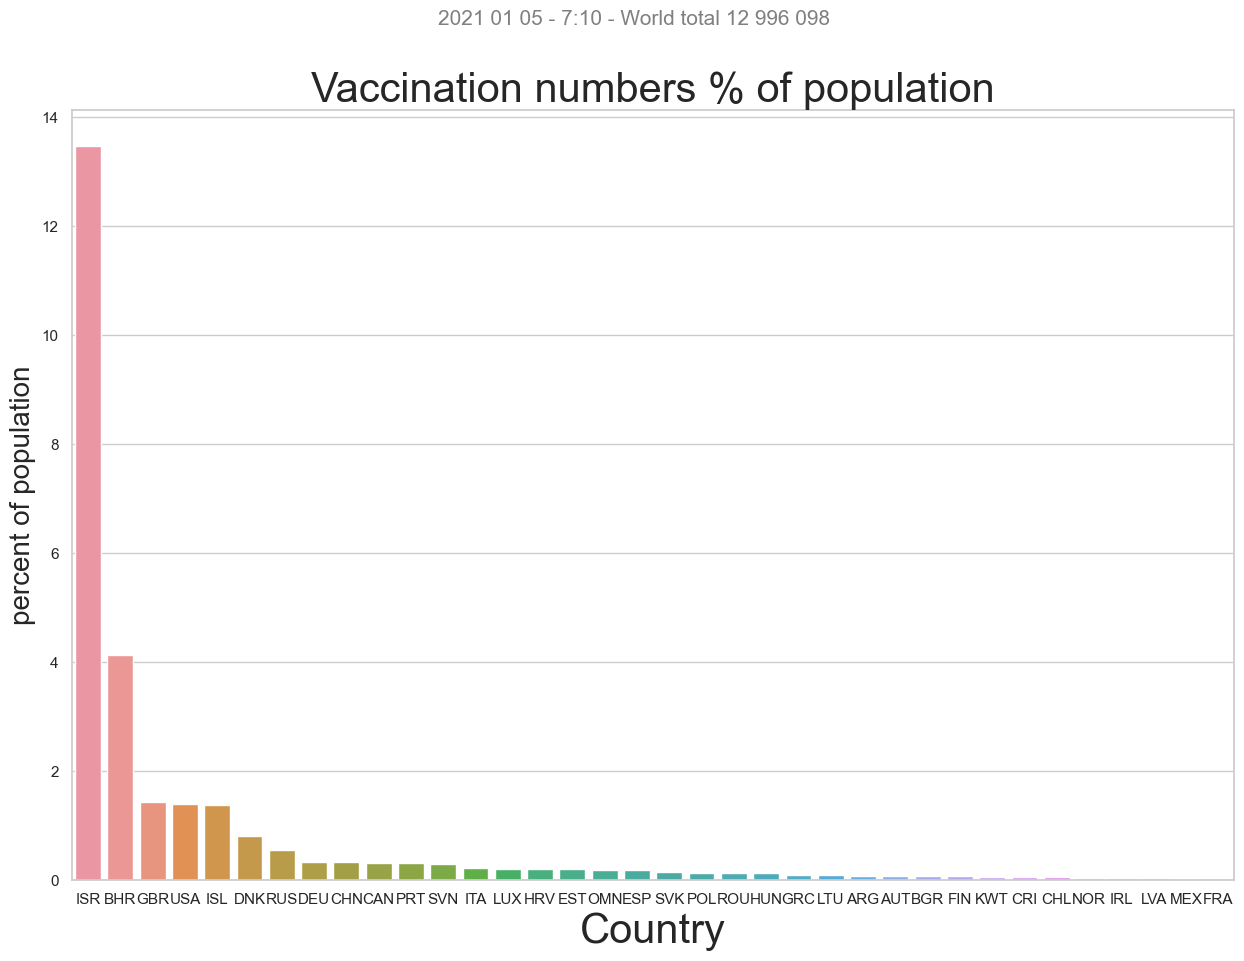

In [32]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

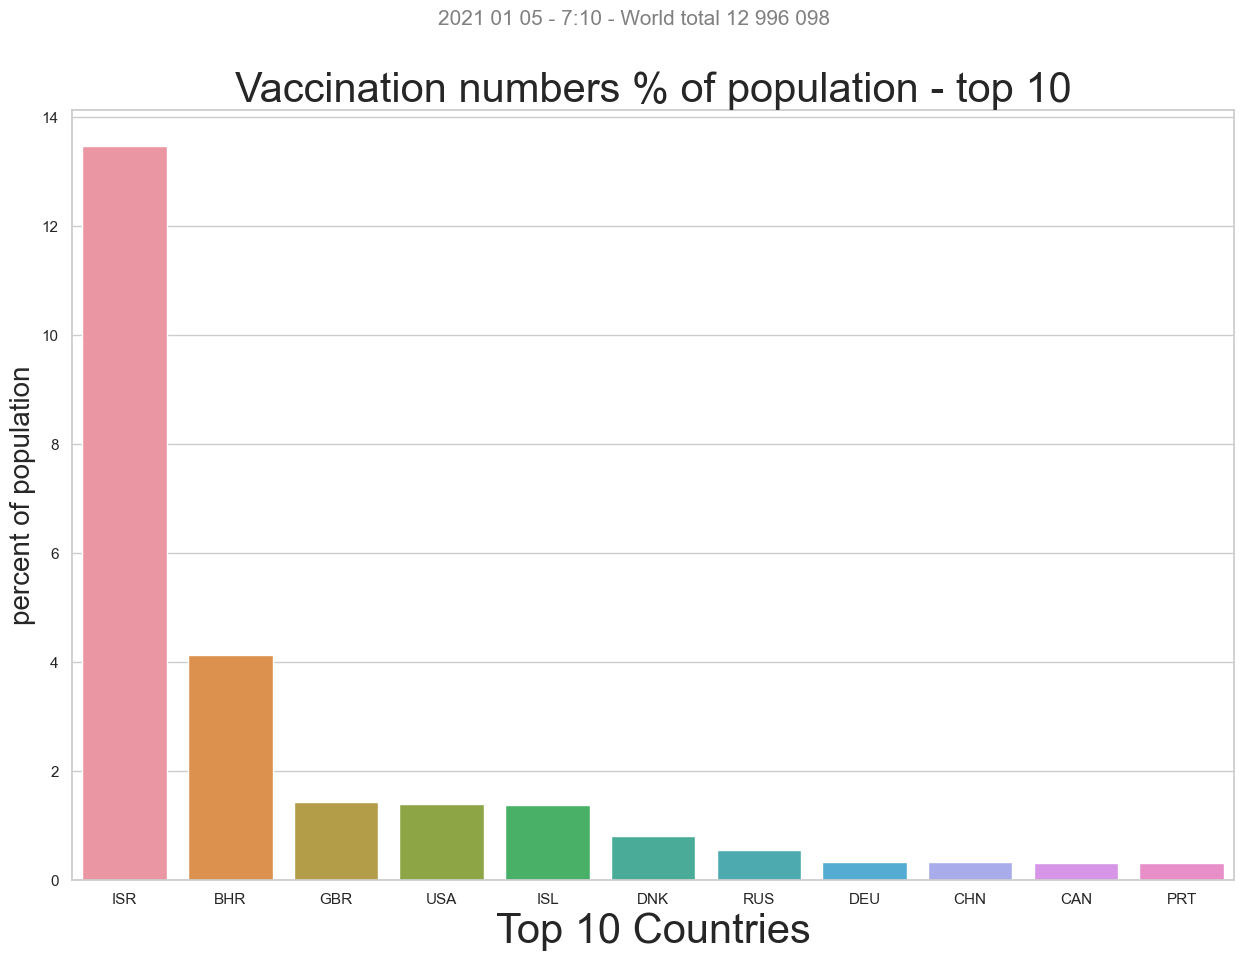

In [33]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

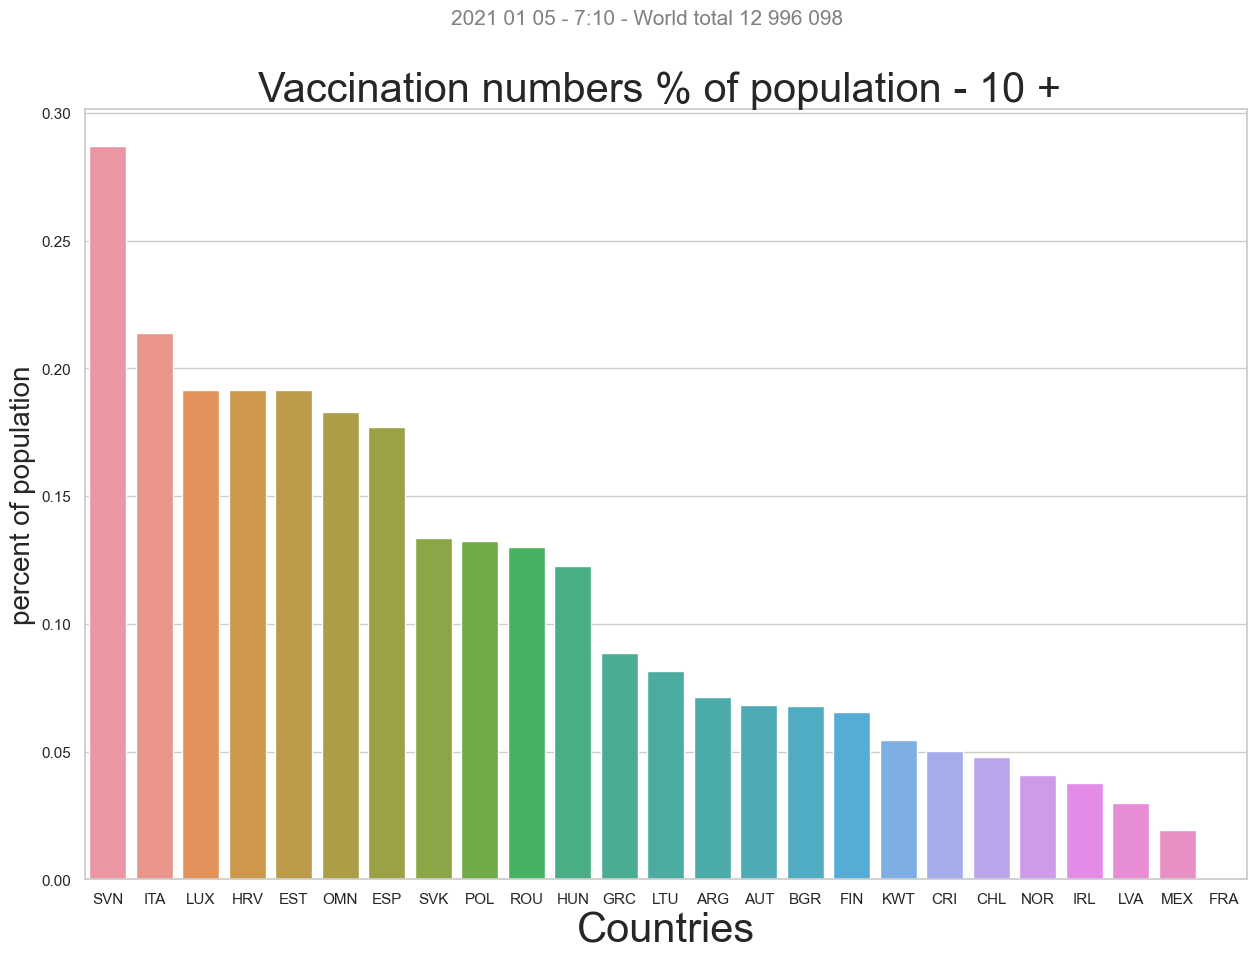

In [34]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

## Scatter plots

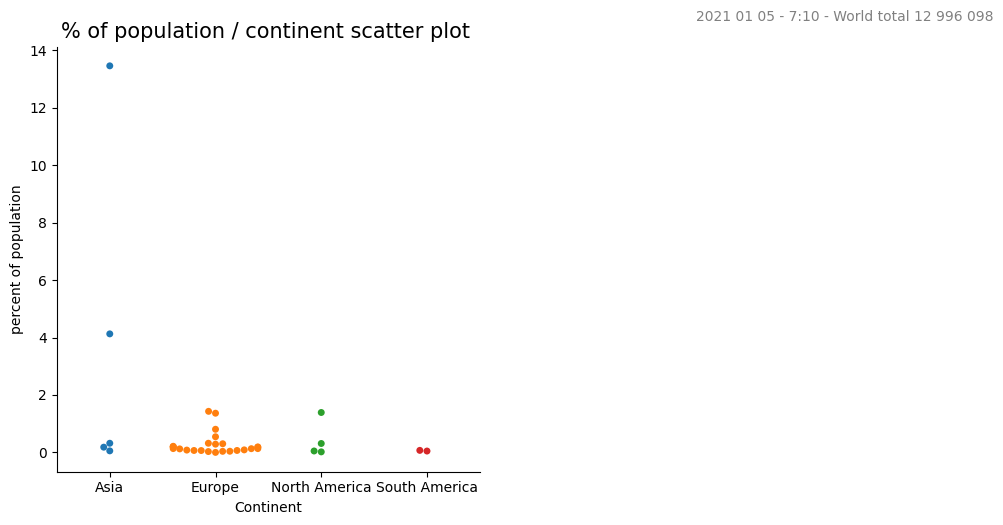

In [35]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

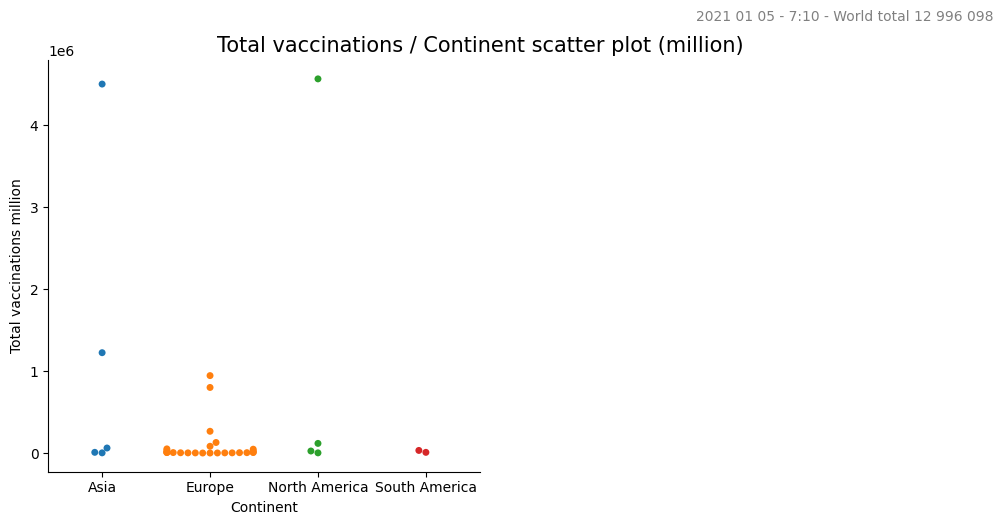

In [36]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [37]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

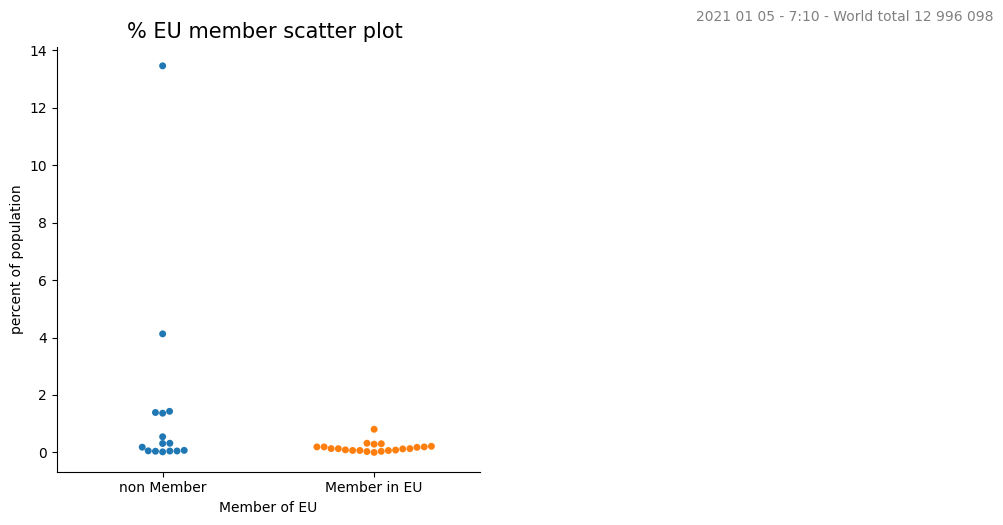

In [38]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

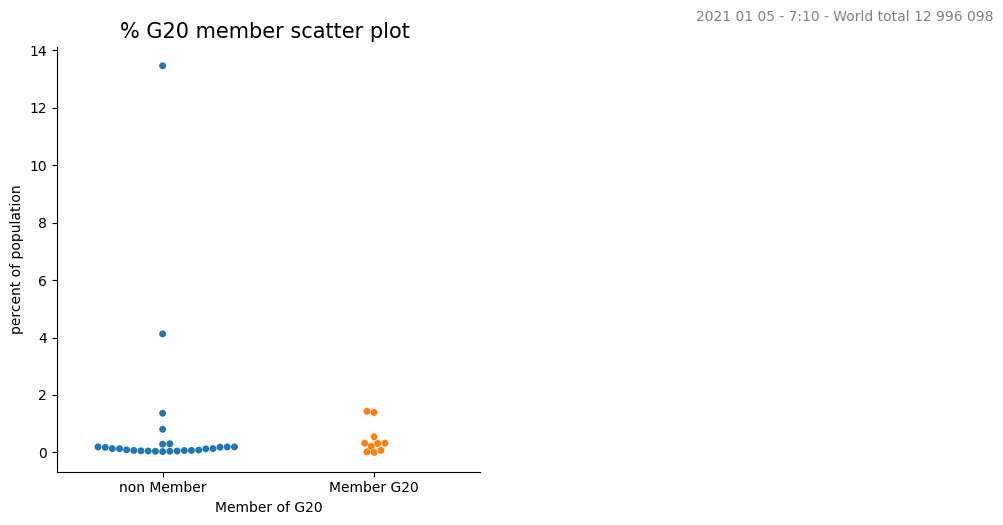

In [39]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

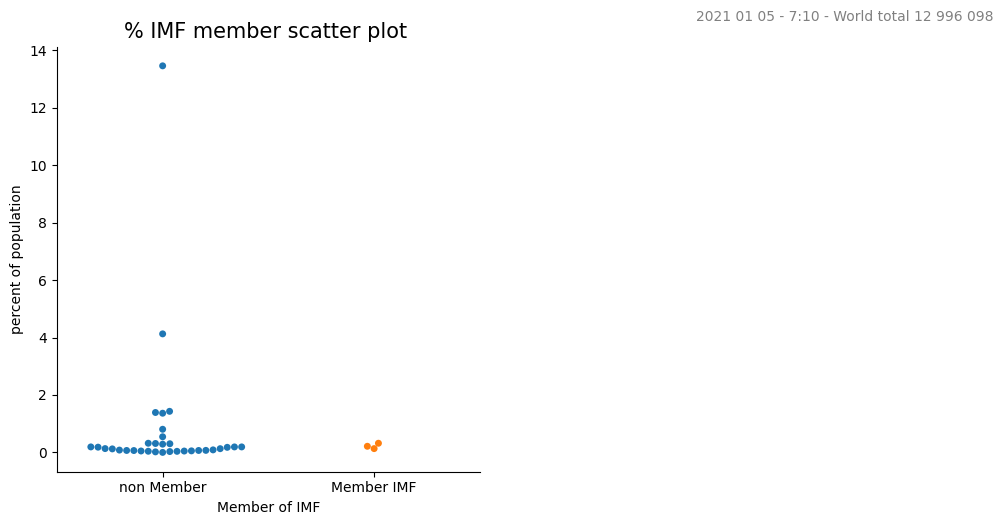

In [40]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [41]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


12 996 098 (36, 3) 2 450 018


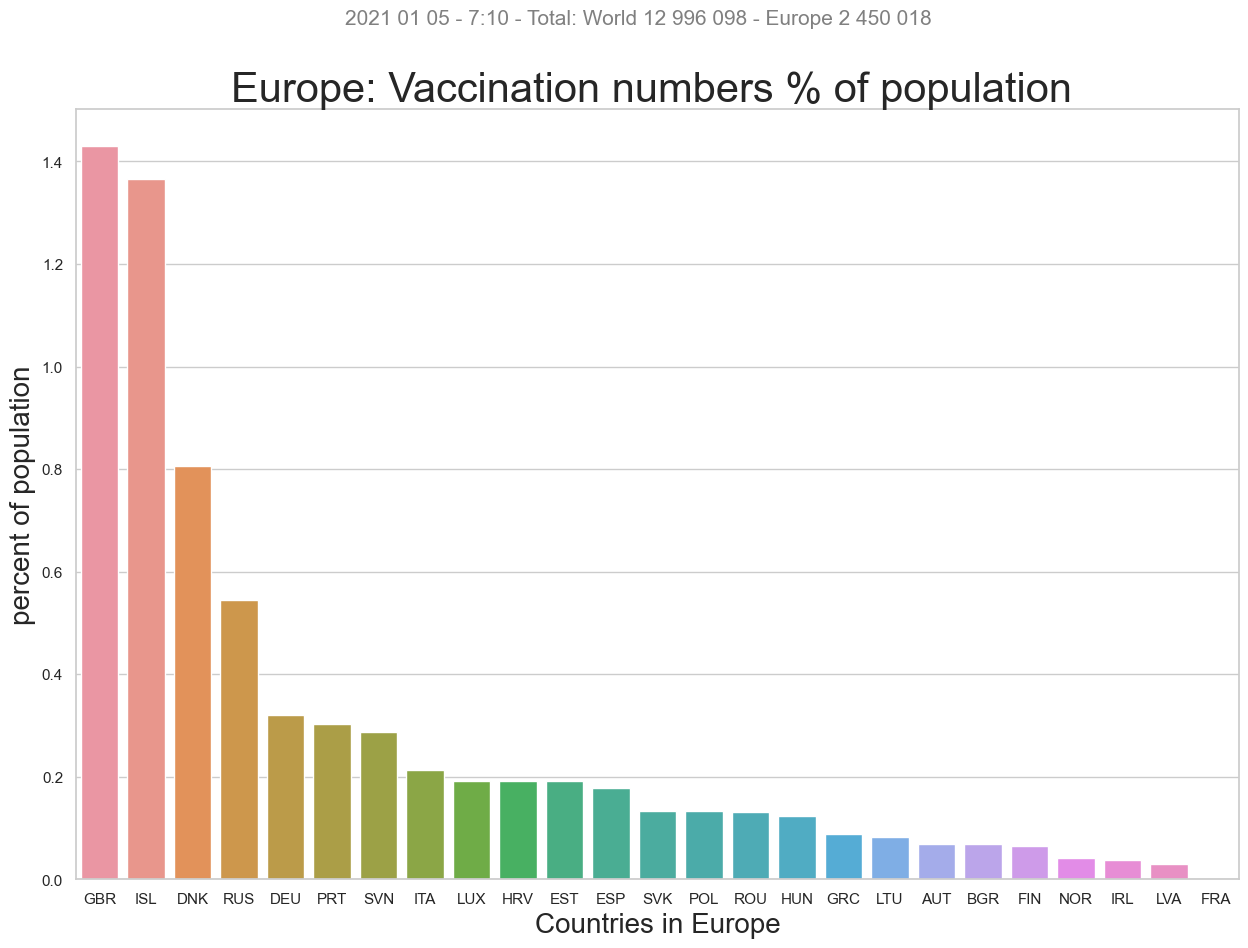

In [42]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [43]:
#CountriesDataEurope

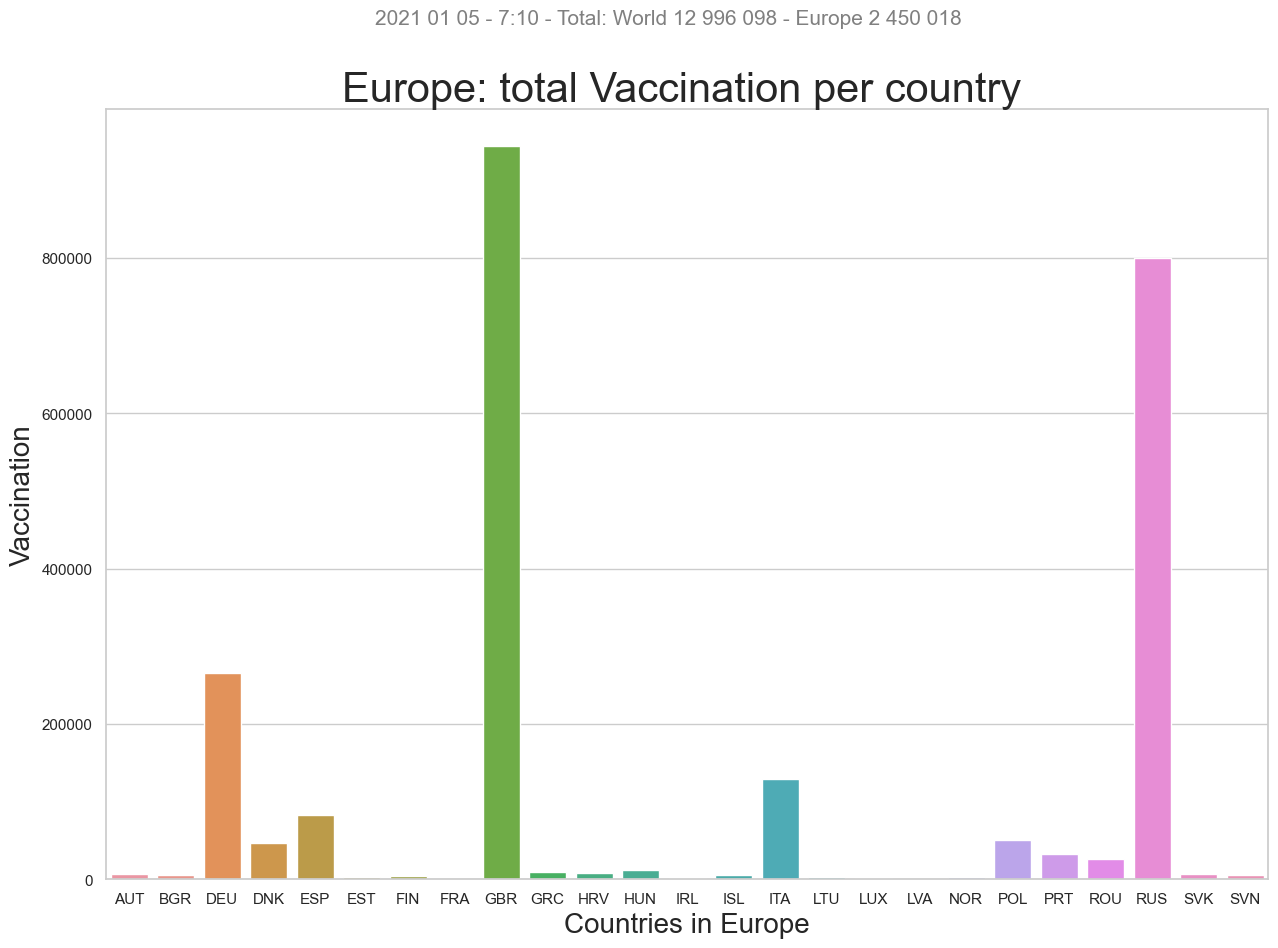

In [44]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [45]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,country_x,memberEU,head_gender,vaccinations_population_percent,total_vaccinations,ISO3166_1
13,Albania,non Member,male,0.000000,0.0,ALB
37,Andorra,non Member,male,0.000000,0.0,AND
2,Armenia,non Member,male,0.000000,0.0,ARM
35,Austria,Member in EU,male,0.068111,6000.0,AUT
6,Azerbaijan,non Member,male,0.000000,0.0,AZE
1,Belgium,Member in EU,male,0.000000,0.0,BEL
49,Bulgaria,Member in EU,male,0.067700,4739.0,BGR
9,Bosnia and Herzegovina,non Member,male,0.000000,0.0,BIH
16,Belarus,non Member,male,0.000000,0.0,BLR
30,Switzerland,non Member,male,0.000000,0.0,CHE


## All countries on continent Europe

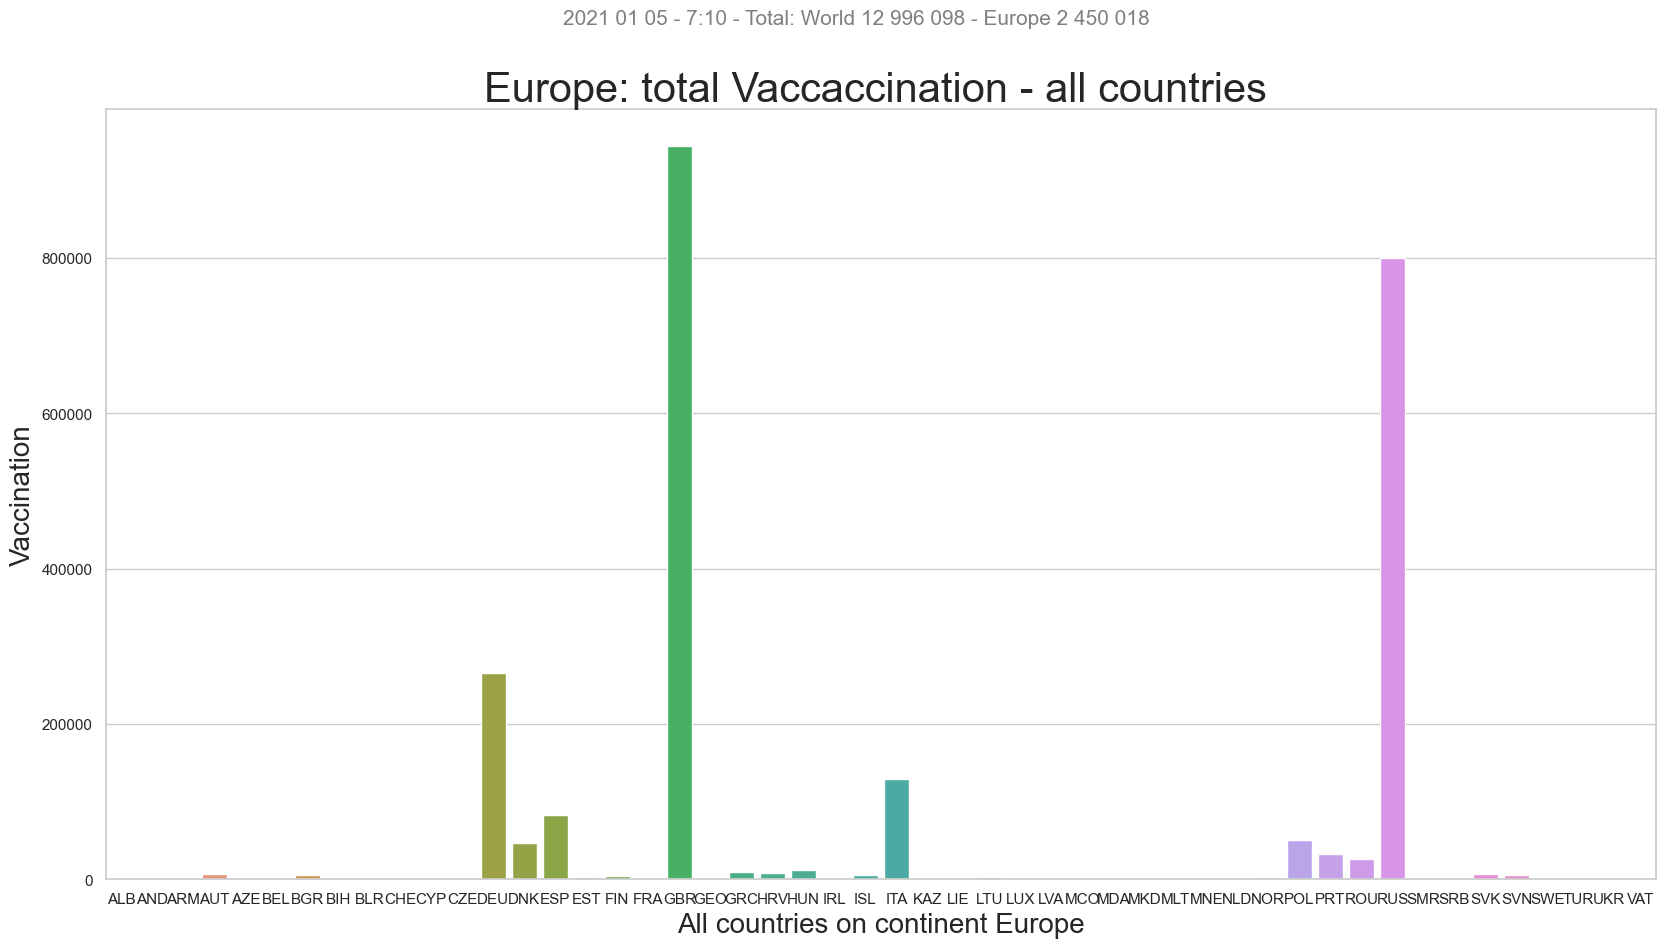

In [46]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [47]:
CountriesDataEuropeAll

,country_x,memberEU,head_gender,vaccinations_population_percent,total_vaccinations,ISO3166_1
13,Albania,non Member,male,0.000000,0.0,ALB
37,Andorra,non Member,male,0.000000,0.0,AND
2,Armenia,non Member,male,0.000000,0.0,ARM
35,Austria,Member in EU,male,0.068111,6000.0,AUT
6,Azerbaijan,non Member,male,0.000000,0.0,AZE
1,Belgium,Member in EU,male,0.000000,0.0,BEL
49,Bulgaria,Member in EU,male,0.067700,4739.0,BGR
9,Bosnia and Herzegovina,non Member,male,0.000000,0.0,BIH
16,Belarus,non Member,male,0.000000,0.0,BLR
30,Switzerland,non Member,male,0.000000,0.0,CHE


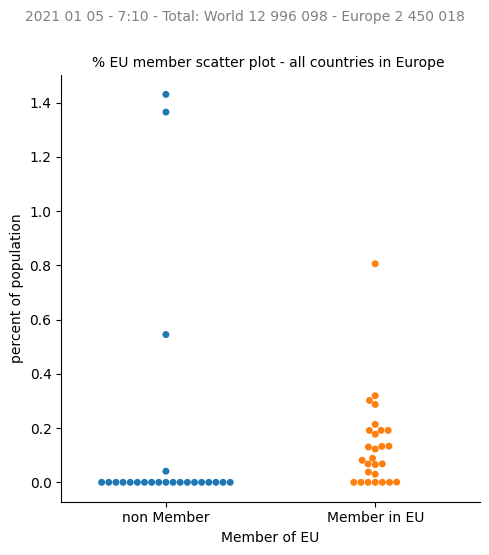

In [48]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [49]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 13 to 39
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_x                        50 non-null     object 
 1   memberEU                         50 non-null     object 
 2   head_gender                      50 non-null     object 
 3   vaccinations_population_percent  50 non-null     float64
 4   total_vaccinations               50 non-null     float64
 5   ISO3166_1                        50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [50]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

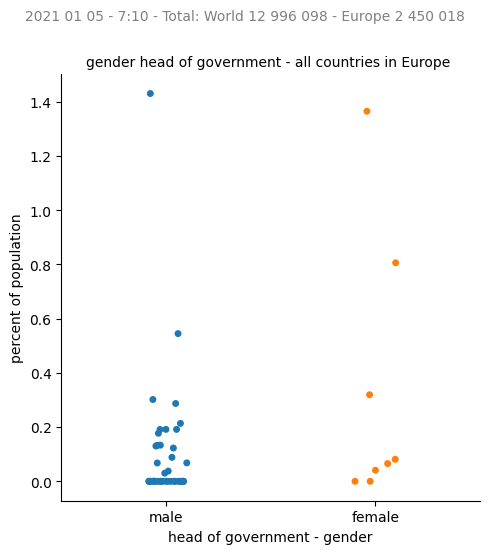

In [51]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

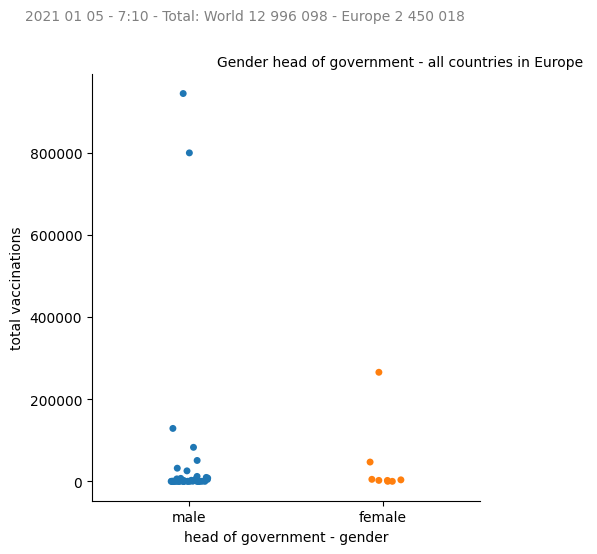

In [52]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [53]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

12 996 098 (36, 3) 2 450 018 (25, 21)


In [54]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-05 07:11:06.979649
Time elapsed (hh:mm:ss.ms) 0:00:31.508645


In [55]:
#The Global State of Democracy Indices
#stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
#df = pd.read_stata(stata_democracy_indices)